# LZW demonstrator (Python 2)

The aim of this note is to  provide some reference facts for LZW---mostly from Thomas and Cover \cite{Cover:2006aa}---adapted to the needs of the  Luminous project. LZW is an algorithm to compute a Kolmogorov Complexity estimate derived from a limited set of programs that only allow copy and insertion in strings (not Turing complete set). Despite its simplicity, it is rather powerful and fast. We focus on definitions of LZW derived complexity consistent with the notion of descriptive length, and discuss different normalizations, which result in a set of metrics we call $\rho_0$ and $\rho_1$.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import sys
sys.path.append('/Users/giulio/Dropbox/Py/github/StarLZW')
import time 
import numpy as np
from starlzw_py2.starlzw import compress,decompress,binarizeby,ComputeDescriptionLength,Compute_rho0,ComputeER



print ("Notebook started on", time.strftime("%Y-%m-%d %H:%M"))

%load_ext autoreload
%autoreload 2

!pwd

Notebook started on 2018-03-24 10:58
/Users/giulio/Dropbox/Py/github/StarLZW/jupyter-demo


# Examples of use

In [2]:
#Example of How to use this:
theString='TOBEORNOTTOBEORTOBE ORNOTTOBEORNOTTOBEORTOBEORNOTTOBEORNOTTOBEORTOBEORNOT 0101100101'
print (theString)


compressed,_ = compress(theString,mode='ascii')
print ("\nThe compressed string:", compressed)
print ("\nNow let's decompress it:", decompress(compressed, mode='ascii'))


TOBEORNOTTOBEORTOBE ORNOTTOBEORNOTTOBEORTOBEORNOTTOBEORNOTTOBEORTOBEORNOT 0101100101
length of input string: 84
length of dictionary: 296
length of result: 41

The compressed string: [84, 79, 66, 69, 79, 82, 78, 79, 84, 256, 258, 260, 265, 69, 32, 260, 262, 264, 257, 259, 261, 263, 268, 267, 274, 271, 277, 280, 276, 273, 266, 82, 278, 284, 32, 48, 49, 291, 292, 291, 291]

Now let's decompress it: TOBEORNOTTOBEORTOBE ORNOTTOBEORNOTTOBEORTOBEORNOTTOBEORNOTTOBEORTOBEORNOT 0101100101


In [3]:
#Another example of How to use this:
theString='111110111110111110111110111110111110111110111110111110111110'
theString='1111101'*10


print (theString)


compressed,_ = compress(theString,mode='binary')
print ("\nThe compressed string:", compressed)

print ("\nNow let's decompress it:", decompress(compressed, mode='binary'))

1111101111110111111011111101111110111111011111101111110111111011111101
length of input string: 70
length of dictionary: 21
length of result: 20

The compressed string: [1, 2, 2, 0, 3, 3, 5, 6, 1, 8, 6, 11, 7, 9, 10, 15, 13, 4, 17, 20]

Now let's decompress it: 1111101111110111111011111101111110111111011111101111110111111011111101


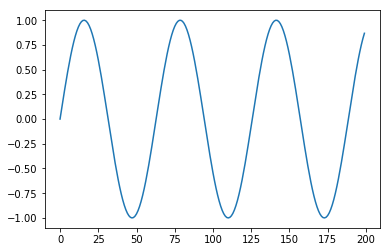

In [4]:
# create a random number list
#datalist= [np.sin(np.random.normal(0)) for n in np.arange(0,1e6)]
datalist= [np.sin(n/10.) for n in np.arange(0,1e6)]
#datalist= [1 for n in np.arange(0,1e6)]

# convert to np.array
theArray = np.array(datalist)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
plt.plot(theArray[0:200])
plt.show()


In [5]:
print ("the raw array:",theArray[0:10])

the raw array: [ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691]


In [6]:
# binarize it
binArray=binarizeby(theArray, method="median")
print ("the binarized array:", binArray[0:10])

 Using median as threshold
 The median is: 5.91872056627e-05
 Binarized data average 0.5
the binarized array: [0 1 1 1 1 1 1 1 1 1]


The description length of the sequence encoded by LZW  would have length less or equal to the number of phrases times the number of bits needed to identify a seen phrase plus the bits to specify a new symbol (to form a new phrase), hence
\begin{equation}
l_{LZW} \le c(n) \log_{2} \left[ c(n)+ \log_{2} A \right] \approx c(n) \log_{2} \left[ c(n)\right]
\end{equation}



In [7]:
print (int(ComputeDescriptionLength(binArray,classic=True)))

length of input string: 1000000
length of dictionary: 12630
length of result: 12629
distinct digits: 2
172078


Actually, we can do a bit better than this. In practice, not all dictionary entries are used. We can use the max dictionary key ID and state that "n bits are needed to describe any key entry, and there are m of them (here they are)", leading to 
$
l_{LZW} \le \log_{2}(\log_{2}  \max(output))+ \mbox{length}(output) *  \log_{2} \left[  \max(output) \right]
$, 
since we need $ \log_{2}(\log_{2}  \max(output))$  bits to describe $n$. This is how it is implemented in the appended code.


In [8]:
int(ComputeDescriptionLength(binArray,classic=False))

length of input string: 1000000
length of dictionary: 12630
length of result: 12629
distinct digits: 2


172056

In [9]:
# compute rho0 metric 
rho0=Compute_rho0(binArray)
print ("compressed information ratio (bits/Sample)=", '{:.2f}'.format(rho0))

length of input string: 1000000
length of dictionary: 12630
length of result: 12629
distinct digits: 2
compressed information ratio (bits/Sample)= 0.17


In [10]:
print ("compressed information ratio (bits/Sample)=", '{:.2f}'.format(ComputeER(binArray,markov_order=4)))

compressed information ratio (bits/Sample)= 0.20
